In [1]:
%pylab inline


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


# Calcul des premiers termes des suites u et v

In [2]:
def u(n):
    if n==0 : return 1
    return u(n-1)+u(n-1)
    
def v(n):
    if n==0 : return 1
    return 2*v(n-1)
    
    
for i in range(8) :
	print '%3d %3d' %(u(i), v(i))

  1   1
  2   2
  4   4
  8   8
 16  16
 32  32
 64  64
128 128


# Calcul de u(26) et v(26) : affichage du temps

In [3]:
import time

start = time.time()
v(26)
print time.time() - start
 

0.000134944915771


In [4]:
start = time.time()
u(26)
print time.time() - start

21.0937569141


# Courbes des temps de calculs

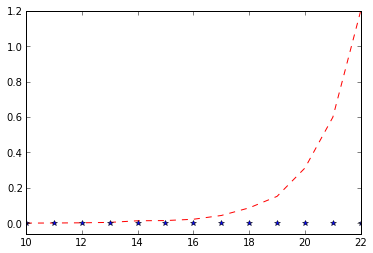

In [5]:
def temps(f,L):
    tps=[]# contiendra une liste de temps de calcul
    for j in L:
        start = time.time()
        f(j)
        dureeCalcul=time.time() - start # dureeCalcul=temps de calcul de f(j)
        tps.append(dureeCalcul)
    return tps

X=range(10,23) 
 
Yu=temps(u,X)# liste des temps de calcul de u(10), u(11), u(12), ..., u(22)
Yv=temps(v,X)# liste des temps de calcul de v(10), v(11), v(12), ..., v(22)
axis([min(X),max(X),-0.05*(max(Yu)-min(Yu)),max(Yu)])# paramètres d'ouverture pour fenêtre graphique
plot(X,Yu,'r--') #   rouge tireté
plot(X,Yv,'b*')#   bleu étoilé
show()

# Pour comprendre ce qui distingue les deux fonctions

In [6]:
c=[]
c.append("\033[01;31m{0}\033[00m")
c.append('\033[1;36m{0}\033[00m')
c.append('\033[1;32m{0}\033[00m')
c.append('\033[1;34m{0}\033[00m')

c.append('\033[1;46m{0}\033[00m')
c.append('\033[1;32m{0}\033[00m')
c.append('\033[1;33m{0}\033[00m')
c.append('\033[1;34m{0}\033[00m')
c.append('\033[1;35m{0}\033[00m')
c.append('\033[1;38m{0}\033[00m')
c.append('\033[1;41m{0}\033[00m')
c.append('\033[1;43m{0}\033[00m')


nb=len(c)
 

def uu(n,color=-1):
    if n==0 : return 1
    else:
        print c[color].format('++'*(n**2)+"appel de u({}) (premier terme)".format(n-1))
        y=uu(n-1,(color+1)%nb) 
        print c[color].format('--'*(n**2)+"sortie de u({}) (premier terme)".format(n-1))
        print c[color].format('++'*(n**2)+"appel de u({}) (second terme)".format(n-1))
        y+=uu(n-1,(color+1)%nb) 
        print c[color].format('--'*(n**2)+"sortie de u({}) (second terme)".format(n-1))
        return y
    
def vv(n,color=-1):
    if n==0 : return 1
    else:
        color=(color+1)%nb
        print c[color].format('++'*(n**2)+"appel de v({})".format(n-1))
        y=2*vv(n-1,color)
        print c[color].format('--'*(n**2)+"sortie de v({})".format(n-1))
        return y
    
    
vv(4)
print "\n\n\n\n\n"
uu(4)

++++++++++++++++++++++++++++++++appel de v(3)
++++++++++++++++++appel de v(2)
++++++++appel de v(1)
++appel de v(0)
--sortie de v(0)
--------sortie de v(1)
------------------sortie de v(2)
--------------------------------sortie de v(3)






++++++++++++++++++++++++++++++++appel de u(3) (premier terme)
++++++++++++++++++appel de u(2) (premier terme)
++++++++appel de u(1) (premier terme)
++appel de u(0) (premier terme)
--sortie de u(0) (premier terme)
++appel de u(0) (second terme)
--sortie de u(0) (second terme)
--------sortie de u(1) (premier terme)
++++++++appel de u(1) (second terme)
++appel de u(0) (premier terme)
--sortie de u(0) (premier terme)
++appel de u(0) (second terme)
--sortie de u(0) (second terme)
--------sortie de u(1) (second terme)
------------------sortie de u(2) (premier terme)
++++++++++++++++++appel de u(2) (second terme)
++++++++appel de u(1) (premier terme)
++appel de u(0) (premier terme)
--sortie de u(0) (premier terme)
++appel de u(0) (second terme)
--sortie d

16

# Courbes des nombres d'opérations

In [7]:
def opu(n):
    if n==0 : return 0
    return 1+2*opu(n-1)
    
def opv(n):
    if n==0 : return 0
    return 1+opv(n-1)
    
    
for i in range(10) :
	print '%3d %3d' %(opu(i), opv(i))

  0   0
  1   1
  3   2
  7   3
 15   4
 31   5
 63   6
127   7
255   8
511   9


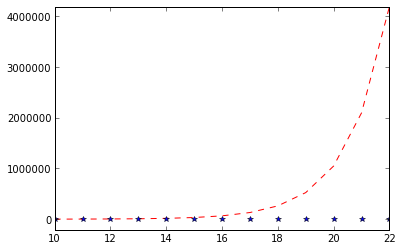

In [8]:
X=range(10,23) 
 
Yopu=[opu(x) for x in X]
Yopv=[opv(x) for x in X]
axis([min(X),max(X),-0.05*(max(Yopu)-min(Yopu)),max(Yopu)])# paramètres d'ouverture pour fenêtre graphique
plot(X,Yopu,'r--',X,Yopv,'b*')  
 
show()

### Décompte des opérations par la machine

In [16]:

def NbOpU(n):
    l=[0]
    def u(n):
        if n==0 : 
            return 1
        else :
            y=u(n-1)+u(n-1)
            l[0]+=1
            return y
    u(n)
    return l[0]
    
    
def NbOpV(n):
    l=[0]
    def v(n):
        if n==0 : 
            return 1
        else :
            y=2*v(n-1)
            l[0]+=1
            return y
    v(n)
    return l[0]

In [17]:
print NbOpU(4)
print NbOpV(4)

15
4


# Estimation du temps de calcul de u(27) à partir de celui de u(22).

### Temps de calcul de u(22)

In [9]:
start = time.time()
u(22)
tempsu22=time.time() - start
print tempsu22

1.23486089706


### Estimation d'un temps pour u(27)

In [10]:
tempsu22*2**5

39.51554870605469

### Mesure expérimentale du temps pour le calcul de u(27)

In [11]:
start = time.time()
u(27)
tempsu27=time.time() - start
print tempsu27

42.5974290371


# Temps linéaire pour la suite v

### vraiment linéaire ?

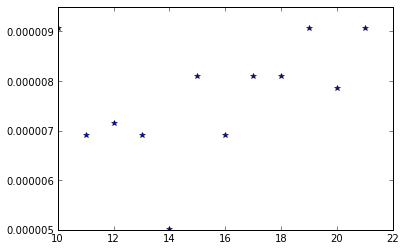

In [12]:
X=range(10,22) 
Y=temps(v,X) 
plot(X,Y,'b*')
show()

### plus convaincant

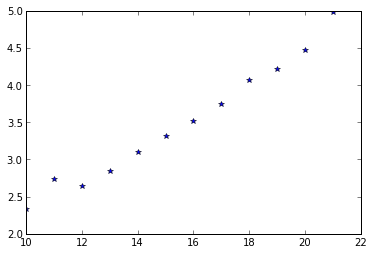

In [13]:
import timeit
def tempsAvecCalculsRepetes(L):
    tps=[]# contiendra une liste de temps de calcul
    for j in L:
        timeit.timeit(number=100000000)
        t = timeit.Timer(stmt="v(%d)"%j, setup="from __main__ import v")  
        tps.append(t.timeit() )
    return tps
    
    
X=range(10,22) 
Y=tempsAvecCalculsRepetes(X) 
plot(X,Y,'b*')
show()